## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

 Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 0

If students address the detailed feedback in a future checkpoint they will earn these points back






|                                  | **Unsatisfactory**                                                                                                                                                                                                                                                                                                                        | **Developing**                                                                                                                                                                                                       | **Proficient**                                                                                                                                                                                            | **Excellent**                                                                                                                                                                            |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **EDA relevance**                | EDA is mostly neither relevant to the question nor helpful in figuring out how to address the question. Or the EDA does address the question, but many obviously relevant variables / analyses / figures were not included. | EDA is partly irrelevant/unhelpful. EDA missed one or two obvioulsy relevant analysis (distributions of single variables or relationships between variables) | EDA includes the obviously relevant / helpful variables in addressing the question.                                                              | Thorough EDA fully explored the dataset                                                                                                                 |
| **EDA analysis and description** | Many of the analyses are poor choices (e.g., using means instead of medians for obviously skewed data), or are poorly described in the text, or do not aid understanding the data                                                                                                                                                     | Some of the analyses are poor choices, or are poorly described in the text, or do not aid understanding the data                                                                                                 | All analyses are correct choices. Only one or two have minor issues in the text descriptions supporting them. Mostly they fit well with other elements of the EDA and support understanding the data  | All analyses are correct choices with clear text descriptions supporting them. The figures fit well with the other elements of the EDA, producing a clear understanding of the data. |
| **EDA figures**                  | Many of the figures are poor plot choices (e.g., using a bar plot to represent a time series where it would be better to use a line plot) or have poor aesthetics (including colormap, data point shape/color, axis labels, titles, annotations, text legibility) or do not aid understanding the data                                | Some of the figures are poor plot choices or have poor aesthetics. Some figures do not aid understanding the data                                                                                                | All figures are correct plot choices. Only one or two have minor questionable aesthetic choices. The figures mostly fit well with the other elements of the EDA and support understanding the data    | All figures are correct plot choices with beautiful aesthetics. The figures fit well with the other elements of the EDA, producing a clear understanding of the data.                |





# COGS 108 - EDA Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

# Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

# Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Data (Updated)

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- Run only once after cloning!!! 
#
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [

{ 
    'url': 'https://drive.google.com/uc?export=download&id=1n4Lw7TohcZKeXrXn_CgRzZW4-3l2WCkc',
    'filename': 'CollegeScorecardDataset.csv',
}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:11<00:00, 11.85s/it]

Successfully downloaded: CollegeScorecardDataset.csv


## Updated Dataset: U.S. Department of Education – College Scorecard (Most Recent Cohort)  
Link to data: https://collegescorecard.ed.gov/data/  

### Dataset Description

We use the U.S. Department of Education College Scorecard – Most Recent Cohorts (Institution-Level) dataset, which contains standardized information on over 6,000 colleges and universities nationwide.    
For our analysis, we extract only the variables directly relevant to our research question: the proportion of students receiving Pell Grants (PCTPELL) and the institutional distribution of degree awards across STEM fields. Pell Grant proportion serves as a widely accepted socioeconomic indicator, as Pell eligibility is strongly tied to low-income status.

To measure how STEM-heavy each institution is, we use College Scorecard’s CIP-based program fields representing the percentage of degrees awarded in specific STEM disciplines: PCIP11 (Computer Science), PCIP14 (Engineering), PCIP15 (Engineering Technologies), PCIP26 (Biological Sciences), PCIP27 (Mathematics/Statistics), PCIP40 (Physical Sciences), and PCIP41 (Science Technologies). These are summed to create a single composite measure (STEM_PCT) indicating the share of total degrees granted in STEM. We restrict the dataset to Bachelor’s degree–granting public institutions using PREDDEG = 3 and CONTROL = 1 to ensure comparability. Additional columns such as INSTNM, STABBR, CITY, UGDS, and MD_EARN_WNE_P10 are retained for context but are not central to the analysis. Together, these processed variables allow us to investigate whether campuses with higher proportions of lower-income students tend to grant a higher or lower percentage of STEM degrees.

## Import + Loading

In [4]:
import pandas as pd
import numpy as np

raw_path = "data/00-raw/CollegeScorecardDataset.csv"
df_raw = pd.read_csv(raw_path)

df_raw.head()

C:\Users\David Yu\AppData\Local\Temp\ipykernel_13940\3723791489.py:5: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(raw_path)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,uah.clearcostcalculator.com/student/default/ne...,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,tcc.ruffalonl.com/Alabama State University/Fre...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4


## Select only Relevant Columns

In [5]:
essential_cols = [
   'UNITID', 'INSTNM', 'STABBR', 'CITY', 'REGION',
    'CONTROL', 'PREDDEG', 'PCTPELL', 'PCTFLOAN',
    'PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41',
    'UGDS', 'MD_EARN_WNE_P10',
    'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR',
]

df = df_raw[essential_cols].copy()
df.head()


,UNITID,INSTNM,STABBR,CITY,REGION,CONTROL,PREDDEG,PCTPELL,PCTFLOAN,PCIP11,...,PCIP27,PCIP40,PCIP41,UGDS,MD_EARN_WNE_P10,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_2MOR
0,100654,Alabama A & M University,AL,Normal,5,1,3,0.6441,0.5859,0.0509,...,0.0098,0.0137,0.0,5726.0,40628.0,0.0180,0.9043,0.0150,0.0017,0.0182
1,100663,University of Alabama at Birmingham,AL,Birmingham,5,1,3,0.3318,0.4097,0.0284,...,0.0046,0.0231,0.0,12118.0,54501.0,0.4832,0.2657,0.0776,0.0915,0.0515
2,100690,Amridge University,AL,Montgomery,5,2,3,0.6842,0.7237,0.0000,...,0.0000,0.0000,0.0,226.0,37621.0,0.2788,0.6681,0.0310,0.0000,0.0000
3,100706,University of Alabama in Huntsville,AL,Huntsville,5,1,3,0.2250,0.3391,0.1010,...,0.0147,0.0514,0.0,6650.0,61767.0,0.6940,0.0907,0.0719,0.0423,0.0508
4,100724,Alabama State University,AL,Montgomery,5,1,3,0.7203,0.7776,0.0568,...,0.0084,0.0126,0.0,3322.0,34502.0,0.0223,0.9082,0.0111,0.0018,0.0126


## Filter Institutions
We keep only:

* Bachelor’s degree–granting institutions (PREDDEG = 3)

* Public colleges/universities (CONTROL = 1)

In [6]:
df = df[
    (df['PREDDEG'] == 3) &
    (df['CONTROL'] == 1)
].copy()

len(df)


600

### Convert STEM Columns to Numeric | Setup STEM Percentage Variable | Convert Pell Grant % to Numeric


In [7]:
stem_cols = ['PCIP11','PCIP14','PCIP15','PCIP26','PCIP27','PCIP40','PCIP41']

for col in stem_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['STEM_PCT'] = df[stem_cols].sum(axis=1, min_count=1)
df['PCTPELL'] = pd.to_numeric(df['PCTPELL'], errors='coerce')


### Data Cleaning

In [8]:
df_analysis = df.dropna(subset=['PCTPELL', 'STEM_PCT'])
len(df_analysis)
df_analysis[['PCTPELL', 'STEM_PCT']].describe()


,PCTPELL,STEM_PCT
count,595.000000,595.000000
mean,0.347797,0.196676
std,0.143365,0.142166
min,0.000000,0.000000
25%,0.245050,0.105000
50%,0.331000,0.169200
75%,0.422750,0.252900
max,0.857100,0.995800


## Save Code into processed

In [9]:
import os
output_path = "data/02-processed/college_scorecard_processed.csv"
df.to_csv(output_path, index=False)

print(f"Processed dataset saved to: {output_path}")

Processed dataset saved to: data/02-processed/college_scorecard_processed.csv


## Results

### Exploratory Data Analysis

Instructions: replace the words in this subsection with whatever words you need to setup and preview the EDA you're going to do.   

Please explicitly load the fully wrangled data you will use from `data/02-processed`.  This is a good idea rather than forcing people to re-run the data getting / wrangling cells above.  Sometimes it takes a long time to get / wrangle data compared to reloading the fixed up dataset.

Carry out whatever EDA you need to for your project in the code cells below.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

Please note that you should consider the use of python modules in your work.  Any code which gets called repeatedly should be modularized. So if you run the same pre-processing, analysis or visualiazation on different subsets of the data, then you should turn that into a function or class.  Put that function or class in a .py file that lives in `modules/`.  Import the module you made and use it to get your work done.  For reference see `get_raw()` which is inside `modules/get_data.py`. 



#### Section 1 of EDA 


In [10]:
# =============================================================================
# SETUP AND CONFIGURATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import warnings
warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (12, 7),
    'figure.dpi': 150,
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': True,
    'legend.fancybox': True,
    'legend.shadow': True,
    'legend.fontsize': 10
})

# Color palette
COLORS = {
    'primary': '#1e3a5f',
    'secondary': '#3d7ea6',
    'tertiary': '#7eb8da',
    'accent': '#e07b39',
    'highlight': '#2d8659',
    'neutral': '#6c757d',
    'negative': '#c44536',
    'positive': '#4a7c59',
}

# STEM field definitions
STEM_COLS = ['PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41']
STEM_NAMES = {
    'PCIP11': 'Computer & Info Science',
    'PCIP14': 'Engineering',
    'PCIP15': 'Engineering Tech',
    'PCIP26': 'Biological Sciences',
    'PCIP27': 'Mathematics & Statistics',
    'PCIP40': 'Physical Sciences',
    'PCIP41': 'Science Technologies'
}

REGION_MAP = {
    1: 'New England', 2: 'Mid-East', 3: 'Great Lakes',
    4: 'Plains', 5: 'Southeast', 6: 'Southwest',
    7: 'Rocky Mountain', 8: 'Far West', 9: 'Outlying Areas'
}

def interpret_effect_size(r):
    """Interpret correlation coefficient effect size."""
    r_abs = abs(r)
    if r_abs < 0.1: return "negligible"
    elif r_abs < 0.3: return "small"
    elif r_abs < 0.5: return "medium"
    else: return "large"

print("Setup complete!")

Setup complete!


### Load Processed Data

We load the fully wrangled dataset from `data/02-processed/`.

In [11]:
# =============================================================================
# DATA LOADING
# =============================================================================

# UPDATE THIS PATH to your processed data location
DATA_PATH = 'data/02-processed/college_scorecard_processed.csv'

# Columns to load
cols_to_load = [
    'UNITID', 'INSTNM', 'STABBR', 'CITY', 'REGION',
    'CONTROL', 'PREDDEG', 'PCTPELL', 'PCTFLOAN',
    'PCIP11', 'PCIP14', 'PCIP15', 'PCIP26', 'PCIP27', 'PCIP40', 'PCIP41',
    'UGDS', 'MD_EARN_WNE_P10',
    'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR',
]

# Load data
df_raw = pd.read_csv(DATA_PATH, low_memory=False, usecols=lambda x: x in cols_to_load)

# Filter: Public + Bachelor's predominant
df_filtered = df_raw[
    (df_raw['PREDDEG'] == 3) & 
    (df_raw['CONTROL'] == 1)
].copy()

# Convert to numeric
numeric_cols = STEM_COLS + ['PCTPELL', 'PCTFLOAN', 'UGDS', 'MD_EARN_WNE_P10',
                            'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_2MOR']
for col in numeric_cols:
    if col in df_filtered.columns:
        df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

# Create STEM percentage
df_filtered['STEM_PCT'] = df_filtered[STEM_COLS].sum(axis=1, min_count=1)

# Final analysis dataset
df = df_filtered.dropna(subset=['PCTPELL', 'STEM_PCT']).copy()

# Create tertiles and region names
df['PELL_TERTILE'] = pd.qcut(df['PCTPELL'], q=3, 
                              labels=['Low Pell\n(Higher Income)', 'Medium Pell', 'High Pell\n(Lower Income)'])
df['REGION_NAME'] = df['REGION'].map(REGION_MAP)

print(f"Loaded {len(df)} institutions for analysis")

Loaded 595 institutions for analysis


---

## Section 1: Dataset Overview and Descriptive Statistics

Before examining relationships, we first characterize the composition and distribution of our dataset.

In [12]:
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"\nTotal institutions: {len(df)}")
print(f"States/territories represented: {df['STABBR'].nunique()}")

print("\nInstitutions by Region:")
print("-" * 40)
for region, count in sorted(df['REGION_NAME'].value_counts().items()):
    print(f"  {region}: {count}")

DATASET OVERVIEW

Total institutions: 595
States/territories represented: 54

Institutions by Region:
----------------------------------------
  Far West: 58
  Great Lakes: 75
  Mid-East: 103
  New England: 39
  Outlying Areas: 15
  Plains: 55
  Rocky Mountain: 27
  Southeast: 155
  Southwest: 67


In [13]:
print("\n" + "="*70)
print("KEY VARIABLE STATISTICS")
print("="*70)

print("\nPell Grant Recipient Rate (proxy for lower-income students):")
pell = df['PCTPELL'].describe()
print(f"  Mean:   {pell['mean']*100:6.2f}%")
print(f"  Median: {pell['50%']*100:6.2f}%")
print(f"  Std:    {pell['std']*100:6.2f}%")
print(f"  Range:  {pell['min']*100:.2f}% - {pell['max']*100:.2f}%")

print("\nSTEM Degree Percentage (combined 7 fields):")
stem = df['STEM_PCT'].describe()
print(f"  Mean:   {stem['mean']*100:6.2f}%")
print(f"  Median: {stem['50%']*100:6.2f}%")
print(f"  Std:    {stem['std']*100:6.2f}%")
print(f"  Range:  {stem['min']*100:.2f}% - {stem['max']*100:.2f}%")

print("\nIndividual STEM Field Averages:")
print("-" * 40)
for col in sorted(STEM_COLS, key=lambda x: -df[x].mean()):
    print(f"  {STEM_NAMES[col]:28s}: {df[col].mean()*100:5.2f}%")


KEY VARIABLE STATISTICS

Pell Grant Recipient Rate (proxy for lower-income students):
  Mean:    34.78%
  Median:  33.10%
  Std:     14.34%
  Range:  0.00% - 85.71%

STEM Degree Percentage (combined 7 fields):
  Mean:    19.67%
  Median:  16.92%
  Std:     14.22%
  Range:  0.00% - 99.58%

Individual STEM Field Averages:
----------------------------------------
  Biological Sciences         :  6.05%
  Engineering                 :  4.99%
  Computer & Info Science     :  4.80%
  Engineering Tech            :  1.62%
  Physical Sciences           :  1.26%
  Mathematics & Statistics    :  0.92%
  Science Technologies        :  0.04%


---

## Section 2: Distribution Analysis

Understanding the distributions of our key variables is crucial for selecting appropriate statistical methods.

In [14]:
# Normality assessment
sample_size = min(5000, len(df))
pell_sample = df['PCTPELL'].dropna().sample(sample_size, random_state=42)
stem_sample = df['STEM_PCT'].dropna().sample(sample_size, random_state=42)

stat_pell, p_pell = stats.shapiro(pell_sample)
stat_stem, p_stem = stats.shapiro(stem_sample)

print("NORMALITY ASSESSMENT")
print("="*70)

print("\nPell Grant %:")
print(f"  Shapiro-Wilk W = {stat_pell:.4f}, p = {p_pell:.4f}")
print(f"  Skewness: {stats.skew(df['PCTPELL']):.3f}")
print(f"  Kurtosis: {stats.kurtosis(df['PCTPELL']):.3f}")
print(f"  Assessment: {'Approximately normal' if p_pell >= 0.05 else 'Non-normal'}")

print("\nSTEM %:")
print(f"  Shapiro-Wilk W = {stat_stem:.4f}, p = {p_stem:.4f}")
print(f"  Skewness: {stats.skew(df['STEM_PCT']):.3f}")
print(f"  Kurtosis: {stats.kurtosis(df['STEM_PCT']):.3f}")
print(f"  Assessment: {'Approximately normal' if p_stem >= 0.05 else 'Non-normal (right-skewed)'}")

print("\n→ Recommendation: Use both Pearson AND Spearman correlations")

NORMALITY ASSESSMENT

Pell Grant %:
  Shapiro-Wilk W = 0.9595, p = 0.0000
  Skewness: 0.810
  Kurtosis: 0.686
  Assessment: Non-normal

STEM %:
  Shapiro-Wilk W = 0.8633, p = 0.0000
  Skewness: 1.901
  Kurtosis: 6.236
  Assessment: Non-normal (right-skewed)

→ Recommendation: Use both Pearson AND Spearman correlations


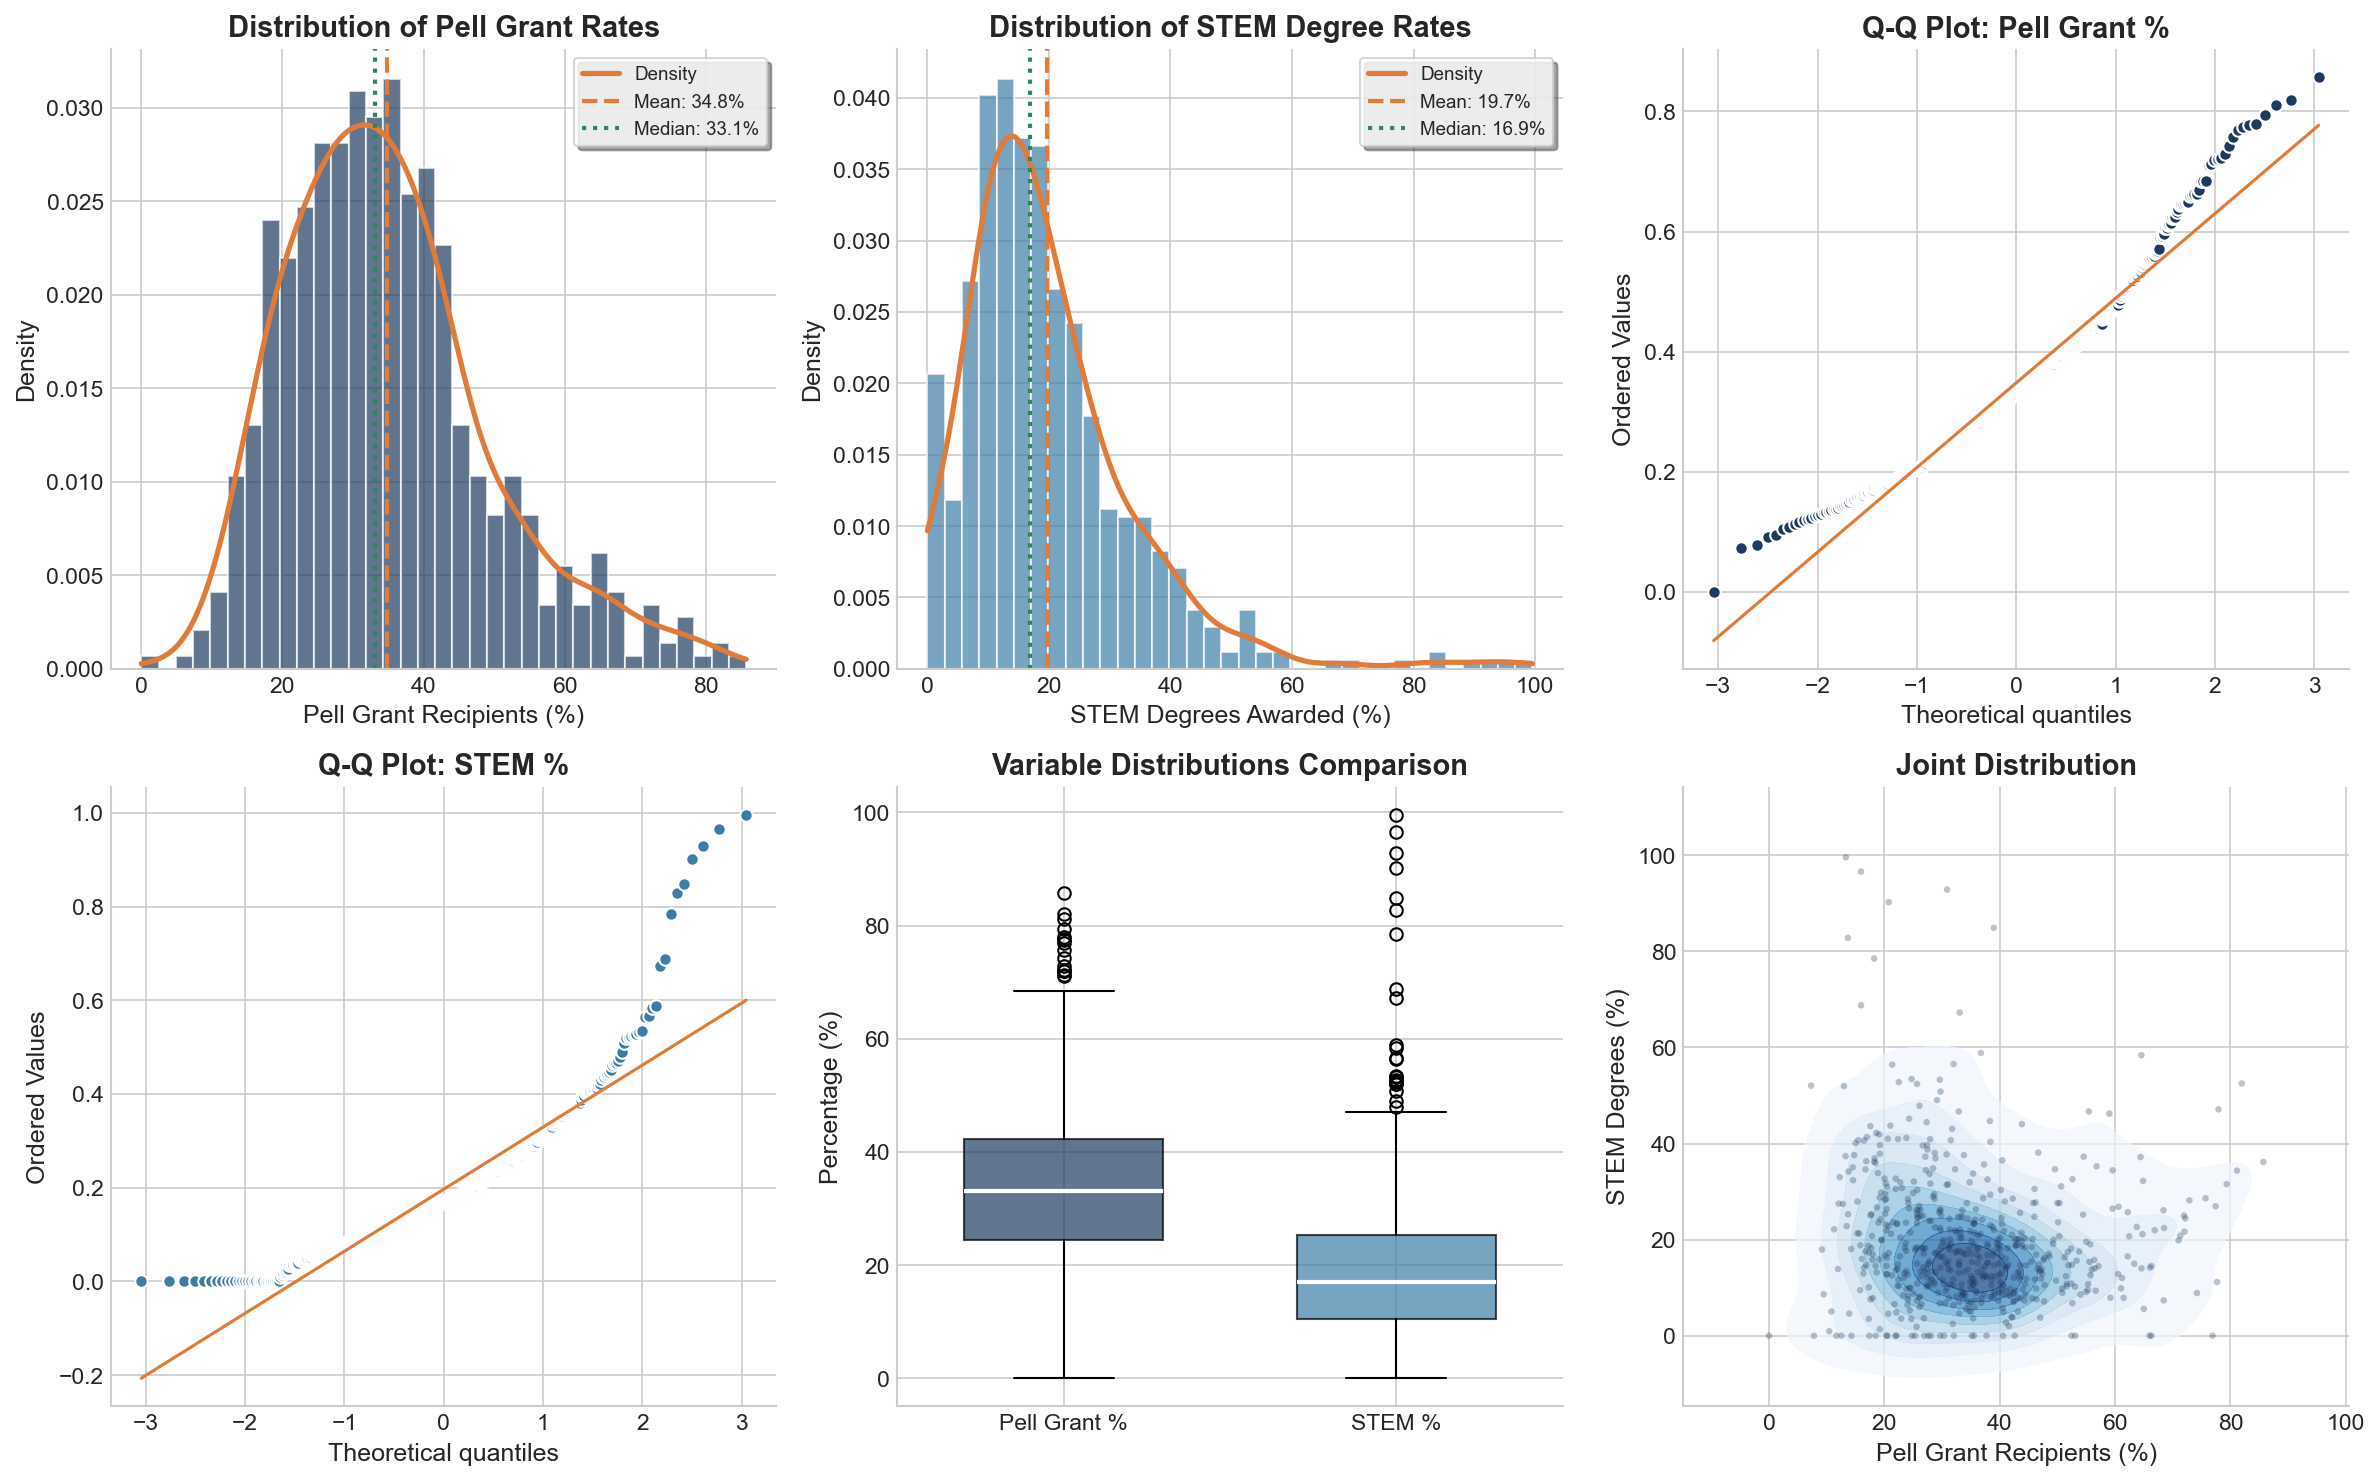

In [15]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Pell histogram
ax = axes[0, 0]
ax.hist(df['PCTPELL'] * 100, bins=35, density=True, color=COLORS['primary'], alpha=0.7, edgecolor='white')
x_kde = np.linspace(df['PCTPELL'].min() * 100, df['PCTPELL'].max() * 100, 200)
kde = gaussian_kde(df['PCTPELL'].dropna() * 100)
ax.plot(x_kde, kde(x_kde), color=COLORS['accent'], linewidth=2.5, label='Density')
ax.axvline(df['PCTPELL'].mean() * 100, color=COLORS['accent'], linestyle='--', linewidth=2, label=f'Mean: {df["PCTPELL"].mean()*100:.1f}%')
ax.axvline(df['PCTPELL'].median() * 100, color=COLORS['highlight'], linestyle=':', linewidth=2, label=f'Median: {df["PCTPELL"].median()*100:.1f}%')
ax.set_xlabel('Pell Grant Recipients (%)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Pell Grant Rates')
ax.legend(loc='upper right', fontsize=9)

# STEM histogram
ax = axes[0, 1]
ax.hist(df['STEM_PCT'] * 100, bins=35, density=True, color=COLORS['secondary'], alpha=0.7, edgecolor='white')
x_kde = np.linspace(df['STEM_PCT'].min() * 100, df['STEM_PCT'].max() * 100, 200)
kde = gaussian_kde(df['STEM_PCT'].dropna() * 100)
ax.plot(x_kde, kde(x_kde), color=COLORS['accent'], linewidth=2.5, label='Density')
ax.axvline(df['STEM_PCT'].mean() * 100, color=COLORS['accent'], linestyle='--', linewidth=2, label=f'Mean: {df["STEM_PCT"].mean()*100:.1f}%')
ax.axvline(df['STEM_PCT'].median() * 100, color=COLORS['highlight'], linestyle=':', linewidth=2, label=f'Median: {df["STEM_PCT"].median()*100:.1f}%')
ax.set_xlabel('STEM Degrees Awarded (%)')
ax.set_ylabel('Density')
ax.set_title('Distribution of STEM Degree Rates')
ax.legend(loc='upper right', fontsize=9)

# Q-Q plots
ax = axes[0, 2]
stats.probplot(df['PCTPELL'].dropna(), dist="norm", plot=ax)
ax.get_lines()[0].set_markerfacecolor(COLORS['primary'])
ax.get_lines()[0].set_markeredgecolor('white')
ax.get_lines()[1].set_color(COLORS['accent'])
ax.set_title('Q-Q Plot: Pell Grant %')

ax = axes[1, 0]
stats.probplot(df['STEM_PCT'].dropna(), dist="norm", plot=ax)
ax.get_lines()[0].set_markerfacecolor(COLORS['secondary'])
ax.get_lines()[0].set_markeredgecolor('white')
ax.get_lines()[1].set_color(COLORS['accent'])
ax.set_title('Q-Q Plot: STEM %')

# Box plots
ax = axes[1, 1]
bp = ax.boxplot([df['PCTPELL'] * 100, df['STEM_PCT'] * 100], labels=['Pell Grant %', 'STEM %'], patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], [COLORS['primary'], COLORS['secondary']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for median in bp['medians']:
    median.set_color('white')
    median.set_linewidth(2)
ax.set_ylabel('Percentage (%)')
ax.set_title('Variable Distributions Comparison')

# Joint distribution
ax = axes[1, 2]
sns.kdeplot(data=df, x=df['PCTPELL']*100, y=df['STEM_PCT']*100, cmap='Blues', fill=True, alpha=0.7, ax=ax, levels=10)
ax.scatter(df['PCTPELL']*100, df['STEM_PCT']*100, alpha=0.3, s=10, color=COLORS['primary'], edgecolors='none')
ax.set_xlabel('Pell Grant Recipients (%)')
ax.set_ylabel('STEM Degrees (%)')
ax.set_title('Joint Distribution')

plt.tight_layout()
plt.show()

---

## Section 3: Primary Relationship Analysis

This section addresses the core research question: What is the relationship between Pell Grant rates and STEM degree production?

In [16]:
# Calculate correlations
r_pearson, p_pearson = stats.pearsonr(df['PCTPELL'], df['STEM_PCT'])
r_spearman, p_spearman = stats.spearmanr(df['PCTPELL'], df['STEM_PCT'])
r_kendall, p_kendall = stats.kendalltau(df['PCTPELL'], df['STEM_PCT'])

# Bootstrap CI
n_bootstrap = 10000
bootstrap_r = []
np.random.seed(42)
for _ in range(n_bootstrap):
    idx = np.random.choice(len(df), size=len(df), replace=True)
    r_boot, _ = stats.pearsonr(df['PCTPELL'].iloc[idx], df['STEM_PCT'].iloc[idx])
    bootstrap_r.append(r_boot)
ci_lower = np.percentile(bootstrap_r, 2.5)
ci_upper = np.percentile(bootstrap_r, 97.5)

# OLS regression
slope, intercept, r, p, se = stats.linregress(df['PCTPELL'], df['STEM_PCT'])

print("CORRELATION ANALYSIS")
print("="*70)
print(f"\n{'Method':<15} {'Coefficient':>12} {'p-value':>15} {'Interpretation':<20}")
print("-" * 65)
print(f"{'Pearson r':<15} {r_pearson:>12.4f} {p_pearson:>15.2e} {'Linear association':<20}")
print(f"{'Spearman ρ':<15} {r_spearman:>12.4f} {p_spearman:>15.2e} {'Monotonic (robust)':<20}")
print(f"{'Kendall τ':<15} {r_kendall:>12.4f} {p_kendall:>15.2e} {'Concordance':<20}")

print(f"\n--- Effect Size ---")
print(f"Pearson r = {r_pearson:.4f}")
print(f"  Effect size: {interpret_effect_size(r_pearson).upper()}")
print(f"  R² = {r_pearson**2:.4f} ({r_pearson**2*100:.2f}% variance explained)")
print(f"  Direction: {'Positive' if r_pearson > 0 else 'Negative'}")

print(f"\n--- 95% Bootstrap CI ---")
print(f"Pearson r: {r_pearson:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

print(f"\n--- OLS Regression ---")
print(f"Equation: STEM% = {intercept:.4f} + {slope:.4f} × PELL%")
print(f"Interpretation: 10 pp increase in Pell → {slope*100*10:.2f} pp change in STEM")

CORRELATION ANALYSIS

Method           Coefficient         p-value Interpretation      
-----------------------------------------------------------------
Pearson r            -0.1068        9.15e-03 Linear association  
Spearman ρ           -0.1357        9.06e-04 Monotonic (robust)  
Kendall τ            -0.0909        9.28e-04 Concordance         

--- Effect Size ---
Pearson r = -0.1068
  Effect size: SMALL
  R² = 0.0114 (1.14% variance explained)
  Direction: Negative

--- 95% Bootstrap CI ---
Pearson r: -0.1068 [-0.1919, -0.0184]

--- OLS Regression ---
Equation: STEM% = 0.2335 + -0.1059 × PELL%
Interpretation: 10 pp increase in Pell → -105.88 pp change in STEM


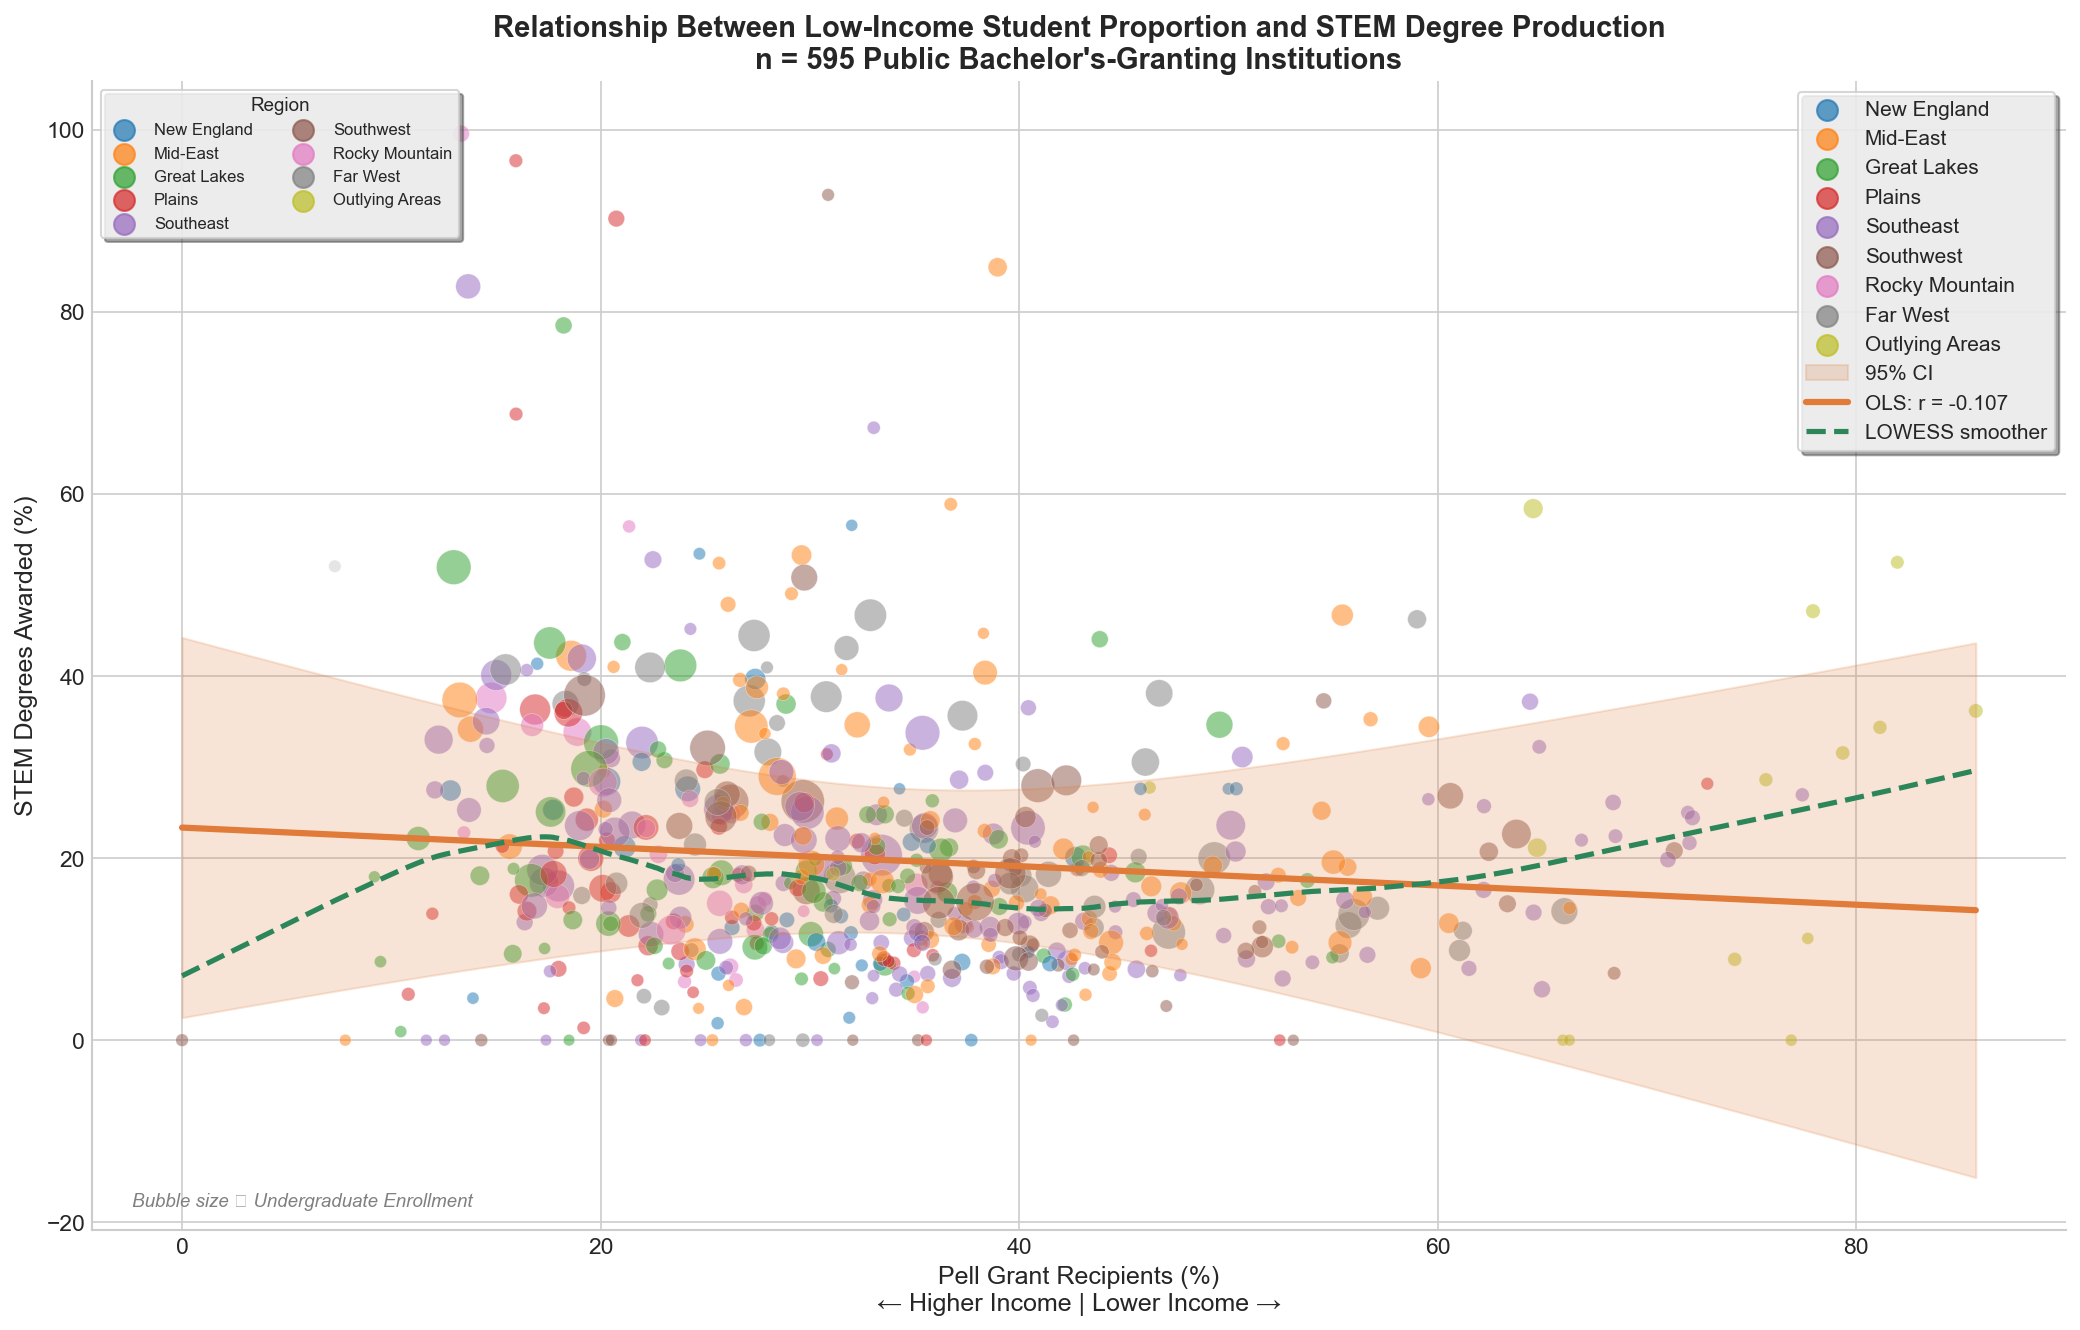

In [17]:
# Main scatterplot
fig, ax = plt.subplots(figsize=(14, 9))

# Bubble sizes and colors
sizes = df['UGDS'].fillna(df['UGDS'].median())
sizes = (sizes / sizes.max()) * 400 + 30
region_colors = {
    'New England': '#1f77b4', 'Mid-East': '#ff7f0e', 'Great Lakes': '#2ca02c',
    'Plains': '#d62728', 'Southeast': '#9467bd', 'Southwest': '#8c564b',
    'Rocky Mountain': '#e377c2', 'Far West': '#7f7f7f', 'Outlying Areas': '#bcbd22'
}
colors = df['REGION_NAME'].map(region_colors).fillna('#cccccc').tolist()

# Scatter
scatter = ax.scatter(df['PCTPELL'] * 100, df['STEM_PCT'] * 100, s=sizes, alpha=0.5, c=colors, edgecolors='white', linewidth=0.3)

# Region legend
handles = [plt.scatter([], [], c=color, s=100, label=region, alpha=0.7) for region, color in region_colors.items() if region in df['REGION_NAME'].values]
legend1 = ax.legend(handles=handles, title='Region', loc='upper left', fontsize=8, title_fontsize=9, ncol=2)
ax.add_artist(legend1)

# Regression line with CI
x_line = np.linspace(df['PCTPELL'].min(), df['PCTPELL'].max(), 100)
y_line = slope * x_line + intercept
n = len(df)
x_mean = df['PCTPELL'].mean()
ss_x = ((df['PCTPELL'] - x_mean)**2).sum()
se_fit = se * np.sqrt(n) * np.sqrt(1/n + (x_line - x_mean)**2 / ss_x)
t_crit = stats.t.ppf(0.975, n-2)
ax.fill_between(x_line * 100, (y_line - t_crit * se_fit) * 100, (y_line + t_crit * se_fit) * 100, color=COLORS['accent'], alpha=0.2, label='95% CI')
ax.plot(x_line * 100, y_line * 100, color=COLORS['accent'], linewidth=3, label=f'OLS: r = {r:.3f}')

# LOWESS
lowess_result = lowess(df['STEM_PCT'] * 100, df['PCTPELL'] * 100, frac=0.3)
ax.plot(lowess_result[:, 0], lowess_result[:, 1], color=COLORS['highlight'], linewidth=2.5, linestyle='--', label='LOWESS smoother')

ax.set_xlabel('Pell Grant Recipients (%)\n← Higher Income | Lower Income →', fontsize=12)
ax.set_ylabel('STEM Degrees Awarded (%)', fontsize=12)
ax.set_title(f'Relationship Between Low-Income Student Proportion and STEM Degree Production\nn = {len(df)} Public Bachelor\'s-Granting Institutions', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.text(0.02, 0.02, 'Bubble size ∝ Undergraduate Enrollment', transform=ax.transAxes, fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

### Key Finding: NEGATIVE Correlation (Opposite of Original Hypothesis)

| Finding | Value | Interpretation |
|---------|-------|----------------|
| Pearson r | **-0.107** | Small negative linear correlation |
| Spearman ρ | **-0.136** | Small negative monotonic correlation |
| p-value | **< 0.01** | Statistically significant |
| R² | **1.14%** | Very little variance explained |

**Interpretation:** Institutions with MORE low-income students tend to have LOWER proportions of STEM degrees.

## Section 5: Potential Confounders

In [18]:
# ANOVA
groups = [df[df['PELL_TERTILE'] == t]['STEM_PCT'].dropna() for t in df['PELL_TERTILE'].cat.categories]
f_stat, p_anova = stats.f_oneway(*groups)

print("ANOVA: STEM % ACROSS PELL TERTILES")
print("="*70)
print(f"\nF-statistic: {f_stat:.4f}")
print(f"p-value: {p_anova:.2e}")
print(f"Result: {'Significant' if p_anova < 0.05 else 'Not significant'} difference across groups")

print("\nTERTILE SUMMARY")
print("-" * 60)
print(f"{'Tertile':<30} {'Mean STEM%':>12} {'Median STEM%':>14} {'n':>8}")
print("-" * 60)
for tertile in df['PELL_TERTILE'].cat.categories:
    subset = df[df['PELL_TERTILE'] == tertile]
    print(f"{str(tertile).replace(chr(10), ' '):<30} {subset['STEM_PCT'].mean()*100:>12.2f}% {subset['STEM_PCT'].median()*100:>13.2f}% {len(subset):>8}")

# Confounder correlations
r_ugds_stem, p1 = stats.spearmanr(df['UGDS'].dropna(), df.loc[df['UGDS'].notna(), 'STEM_PCT'])
r_ugds_pell, p2 = stats.spearmanr(df['UGDS'].dropna(), df.loc[df['UGDS'].notna(), 'PCTPELL'])

print("\nCONFOUNDER: ENROLLMENT SIZE")
print("-" * 50)
print(f"Enrollment ↔ STEM%:  ρ = {r_ugds_stem:.4f} (p = {p1:.4f})")
print(f"Enrollment ↔ Pell%:  ρ = {r_ugds_pell:.4f} (p = {p2:.4f})")
print(f"\n→ Recommendation: Control for log(enrollment) in regression")

ANOVA: STEM % ACROSS PELL TERTILES

F-statistic: 8.3317
p-value: 2.70e-04
Result: Significant difference across groups

TERTILE SUMMARY
------------------------------------------------------------
Tertile                          Mean STEM%   Median STEM%        n
------------------------------------------------------------
Low Pell (Higher Income)              22.87%         19.88%      199
Medium Pell                           18.82%         16.63%      197
High Pell (Lower Income)              17.30%         14.82%      199

CONFOUNDER: ENROLLMENT SIZE
--------------------------------------------------
Enrollment ↔ STEM%:  ρ = 0.3787 (p = 0.0000)
Enrollment ↔ Pell%:  ρ = -0.1522 (p = 0.0002)

→ Recommendation: Control for log(enrollment) in regression


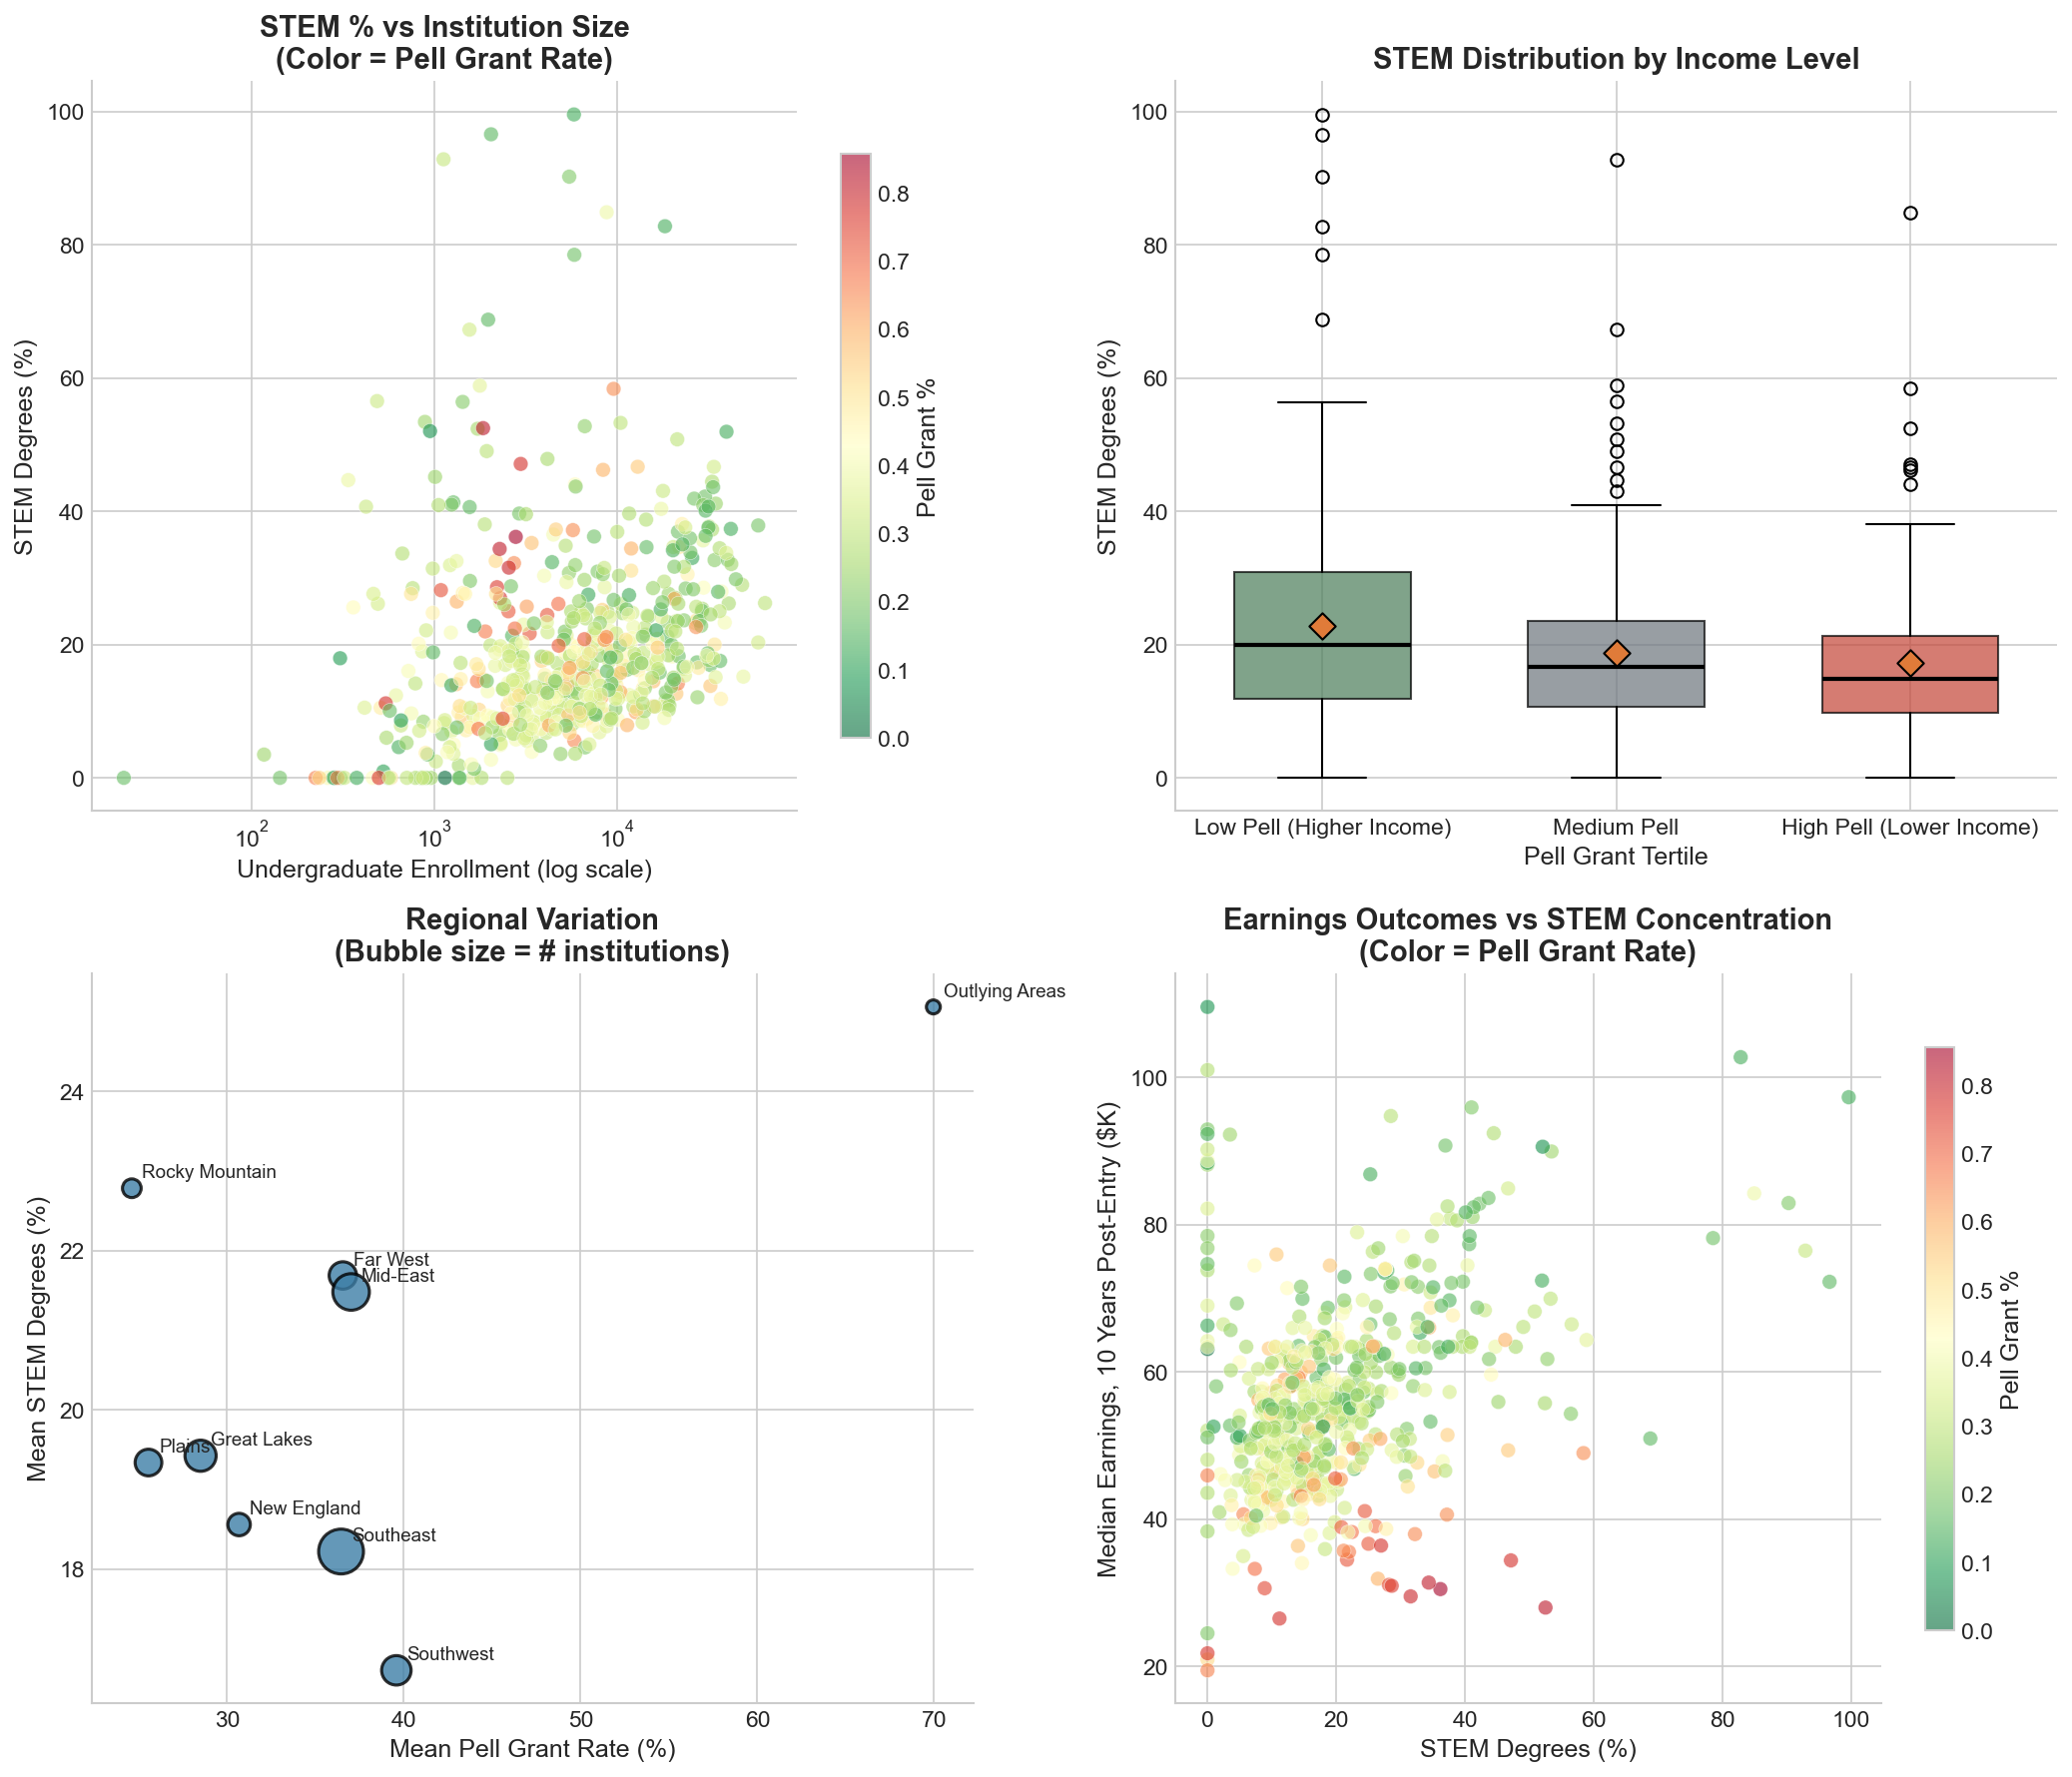

In [19]:
# Confounder plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Enrollment vs STEM
ax = axes[0, 0]
valid = df.dropna(subset=['UGDS'])
scatter = ax.scatter(valid['UGDS'], valid['STEM_PCT'] * 100, c=valid['PCTPELL'], cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='white', linewidth=0.3)
ax.set_xscale('log')
ax.set_xlabel('Undergraduate Enrollment (log scale)')
ax.set_ylabel('STEM Degrees (%)')
ax.set_title('STEM % vs Institution Size\n(Color = Pell Grant Rate)', fontweight='bold')
plt.colorbar(scatter, ax=ax, shrink=0.8, label='Pell Grant %')

# Box plot
ax = axes[0, 1]
tertile_data = [df[df['PELL_TERTILE'] == t]['STEM_PCT'] * 100 for t in df['PELL_TERTILE'].cat.categories]
bp = ax.boxplot(tertile_data, labels=[str(t).replace('\n', ' ') for t in df['PELL_TERTILE'].cat.categories], patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], [COLORS['positive'], COLORS['neutral'], COLORS['negative']]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)
ax.set_xlabel('Pell Grant Tertile')
ax.set_ylabel('STEM Degrees (%)')
ax.set_title('STEM Distribution by Income Level', fontweight='bold')
for i, tertile in enumerate(df['PELL_TERTILE'].cat.categories):
    mean_val = df[df['PELL_TERTILE'] == tertile]['STEM_PCT'].mean() * 100
    ax.scatter(i+1, mean_val, marker='D', s=80, c=COLORS['accent'], zorder=5, edgecolors='black', linewidth=1)

# Regional variation
ax = axes[1, 0]
region_stats = df.groupby('REGION_NAME').agg({'STEM_PCT': 'mean', 'PCTPELL': 'mean', 'UNITID': 'count'}).dropna()
region_stats.columns = ['STEM_mean', 'PELL_mean', 'n']
scatter = ax.scatter(region_stats['PELL_mean'] * 100, region_stats['STEM_mean'] * 100, s=region_stats['n'] * 3, c=COLORS['secondary'], edgecolors='black', linewidth=1.5, alpha=0.8)
for region, row in region_stats.iterrows():
    ax.annotate(region, (row['PELL_mean']*100, row['STEM_mean']*100), xytext=(5, 5), textcoords='offset points', fontsize=9)
ax.set_xlabel('Mean Pell Grant Rate (%)')
ax.set_ylabel('Mean STEM Degrees (%)')
ax.set_title('Regional Variation\n(Bubble size = # institutions)', fontweight='bold')

# Earnings
ax = axes[1, 1]
valid = df.dropna(subset=['MD_EARN_WNE_P10'])
valid['MD_EARN_WNE_P10'] = pd.to_numeric(valid['MD_EARN_WNE_P10'], errors='coerce')
valid = valid.dropna(subset=['MD_EARN_WNE_P10'])
if len(valid) > 50:
    scatter = ax.scatter(valid['STEM_PCT'] * 100, valid['MD_EARN_WNE_P10'] / 1000, c=valid['PCTPELL'], cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='white', linewidth=0.3)
    ax.set_xlabel('STEM Degrees (%)')
    ax.set_ylabel('Median Earnings, 10 Years Post-Entry ($K)')
    ax.set_title('Earnings Outcomes vs STEM Concentration\n(Color = Pell Grant Rate)', fontweight='bold')
    plt.colorbar(scatter, ax=ax, shrink=0.8, label='Pell Grant %')

plt.tight_layout()
plt.show()

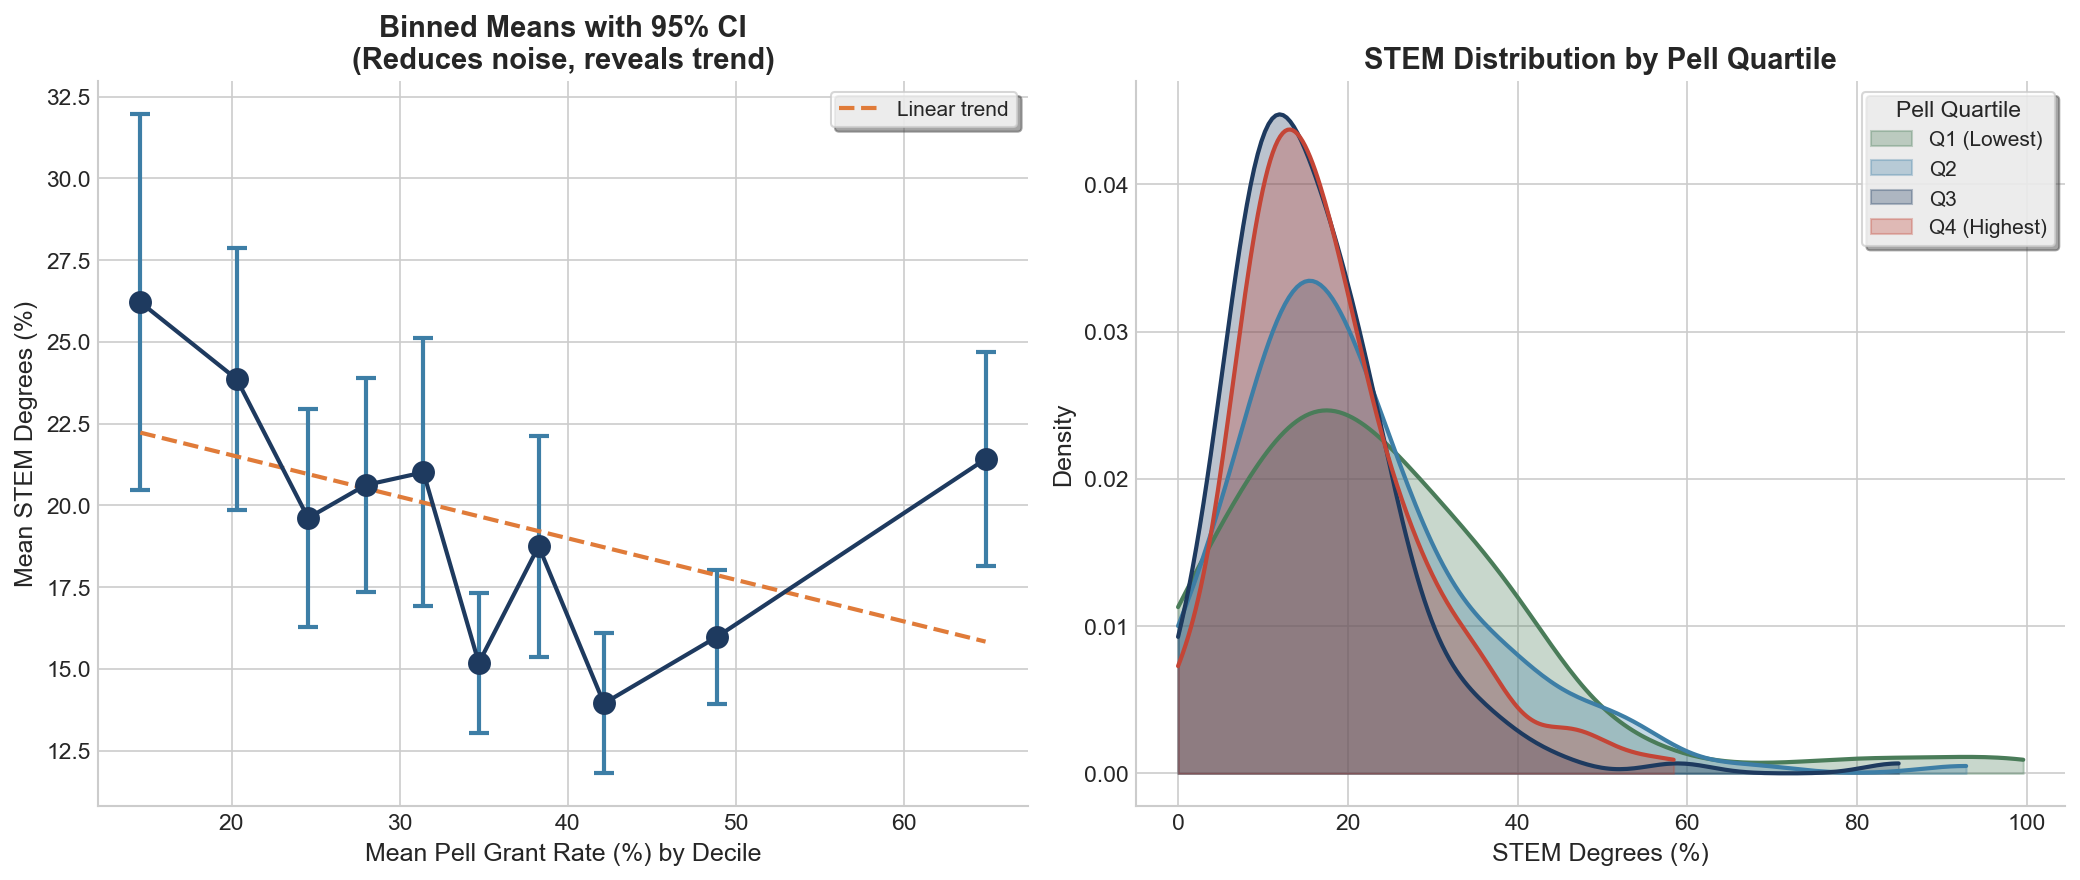

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Binned means
ax = axes[0]
df_temp = df.copy()
df_temp['PELL_DECILE'] = pd.qcut(df_temp['PCTPELL'], q=10, labels=False, duplicates='drop')
decile_stats = df_temp.groupby('PELL_DECILE').agg({'PCTPELL': 'mean', 'STEM_PCT': ['mean', 'std', 'count']}).reset_index()
decile_stats.columns = ['decile', 'pell_mean', 'stem_mean', 'stem_std', 'n']
decile_stats['stem_se'] = decile_stats['stem_std'] / np.sqrt(decile_stats['n'])

ax.errorbar(decile_stats['pell_mean'] * 100, decile_stats['stem_mean'] * 100, yerr=1.96 * decile_stats['stem_se'] * 100, fmt='o-', color=COLORS['primary'], markersize=10, capsize=5, capthick=2, linewidth=2, ecolor=COLORS['secondary'])
slope_bin, intercept_bin, _, _, _ = stats.linregress(decile_stats['pell_mean'], decile_stats['stem_mean'])
x_fit = np.linspace(decile_stats['pell_mean'].min(), decile_stats['pell_mean'].max(), 100)
ax.plot(x_fit * 100, (slope_bin * x_fit + intercept_bin) * 100, '--', color=COLORS['accent'], linewidth=2, label='Linear trend')
ax.set_xlabel('Mean Pell Grant Rate (%) by Decile')
ax.set_ylabel('Mean STEM Degrees (%)')
ax.set_title('Binned Means with 95% CI\n(Reduces noise, reveals trend)', fontweight='bold')
ax.legend()

# Quartile densities
ax = axes[1]
df_temp['PELL_QUARTILE'] = pd.qcut(df_temp['PCTPELL'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
colors_quartile = [COLORS['positive'], COLORS['secondary'], COLORS['primary'], COLORS['negative']]
for quartile, color in zip(['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'], colors_quartile):
    subset = df_temp[df_temp['PELL_QUARTILE'] == quartile]['STEM_PCT'] * 100
    kde = gaussian_kde(subset.dropna())
    x_range = np.linspace(0, subset.max(), 200)
    ax.fill_between(x_range, kde(x_range), alpha=0.3, color=color, label=quartile)
    ax.plot(x_range, kde(x_range), color=color, linewidth=2)
ax.set_xlabel('STEM Degrees (%)')
ax.set_ylabel('Density')
ax.set_title('STEM Distribution by Pell Quartile', fontweight='bold')
ax.legend(title='Pell Quartile', loc='upper right')

plt.tight_layout()
plt.show()

---

## Section 7: EDA Summary

### Key Findings

1. **Primary Relationship**: Small negative correlation (r = -0.107, p < 0.01)
2. **STEM Heterogeneity**: Engineering drives the negative relationship
3. **Confounders**: Enrollment size should be controlled
4. **Direction**: Opposite of original hypothesis

### Next Steps
1. Run OLS regression with controls
2. Perform permutation test
3. Analyze individual STEM fields separately

In [21]:
print("="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\nDataset: {len(df)} public bachelor's-granting institutions")
print(f"\nCorrelation (Pell % vs STEM %):")
print(f"  Pearson r:  {r_pearson:.4f} (p = {p_pearson:.2e})")
print(f"  Spearman ρ: {r_spearman:.4f} (p = {p_spearman:.2e})")
print(f"  95% CI:     [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"  R²:         {r_pearson**2:.4f} ({r_pearson**2*100:.2f}% variance explained)")
print(f"\nEffect size: {interpret_effect_size(r_pearson).upper()}")
print(f"Direction: NEGATIVE (opposite of original hypothesis)")

FINAL SUMMARY

Dataset: 595 public bachelor's-granting institutions

Correlation (Pell % vs STEM %):
  Pearson r:  -0.1068 (p = 9.15e-03)
  Spearman ρ: -0.1357 (p = 9.06e-04)
  95% CI:     [-0.1919, -0.0184]
  R²:         0.0114 (1.14% variance explained)

Effect size: SMALL
Direction: NEGATIVE (opposite of original hypothesis)


## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them